In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
from scipy import stats
import geopandas as gpd
%matplotlib inline

In [2]:
import dask.dataframe as dd

In [3]:
CA_statewide = dd.read_csv('ca_statewide.csv')

In [4]:
CA_statewide.head()

,raw_row_number,date,county_name,district,subject_race,subject_sex,department_name,type,violation,arrest_made,...,warning_issued,outcome,contraband_found,frisk_performed,search_conducted,search_person,search_basis,reason_for_stop,raw_race,raw_search_basis
0,1,2009-07-01,Stanislaus County,Modesto,other,male,California Highway Patrol,vehicular,Motorist / Public Service,NaN,...,NaN,NaN,NaN,NaN,False,False,NaN,Motorist / Public Service,Other,Vehicle Inventory
1,2,2009-07-01,Stanislaus County,Modesto,hispanic,female,California Highway Patrol,vehicular,Moving Violation (VC),False,...,False,summons,NaN,NaN,False,False,NaN,Moving Violation (VC),Hispanic,Probable Cause (positive)
2,3,2009-07-01,Stanislaus County,Modesto,hispanic,female,California Highway Patrol,vehicular,Moving Violation (VC),False,...,False,summons,NaN,NaN,True,NaN,other,Moving Violation (VC),Hispanic,Probable Cause (positive)
3,4,2009-07-01,Stanislaus County,Modesto,white,female,California Highway Patrol,vehicular,Moving Violation (VC),False,...,False,summons,NaN,NaN,False,False,NaN,Moving Violation (VC),White,Probable Cause (positive)
4,5,2009-07-01,Stanislaus County,Modesto,hispanic,male,California Highway Patrol,vehicular,Moving Violation (VC),False,...,False,summons,NaN,NaN,True,NaN,other,Moving Violation (VC),Hispanic,Probable Cause (positive)


In [5]:
len(CA_statewide)

31778515

Dask Series Structure:
npartitions=1
    object
       ...
Name: date, dtype: object
Dask Name: unique-agg, 577 tasks

In [5]:
from datetime import datetime

In [6]:
CA_statewide = CA_statewide.compute()

In [7]:
type(CA_statewide)

pandas.core.frame.DataFrame

In [8]:
CA_statewide = CA_statewide.dropna(axis=1)

In [9]:
CA_statewide.head()

,raw_row_number,date,department_name,type,violation,search_conducted,reason_for_stop,raw_search_basis
0,1,2009-07-01,California Highway Patrol,vehicular,Motorist / Public Service,False,Motorist / Public Service,Vehicle Inventory
1,2,2009-07-01,California Highway Patrol,vehicular,Moving Violation (VC),False,Moving Violation (VC),Probable Cause (positive)
2,3,2009-07-01,California Highway Patrol,vehicular,Moving Violation (VC),True,Moving Violation (VC),Probable Cause (positive)
3,4,2009-07-01,California Highway Patrol,vehicular,Moving Violation (VC),False,Moving Violation (VC),Probable Cause (positive)
4,5,2009-07-01,California Highway Patrol,vehicular,Moving Violation (VC),True,Moving Violation (VC),Probable Cause (positive)


In [10]:
CA_statewide['date'].unique()

array(['2009-07-01', '2009-07-02', '2009-07-03', ..., '2016-06-28',
       '2016-06-29', '2016-06-30'], dtype=object)

In [11]:
CA_statewide['date'].dtypes

dtype('O')

In [12]:
CA_statewide['date'] = pd.to_datetime(CA_statewide['date'])

In [12]:
CA_statewide.head()

,raw_row_number,date,department_name,type,violation,search_conducted,reason_for_stop,raw_search_basis
0,1,2009-07-01,California Highway Patrol,vehicular,Motorist / Public Service,False,Motorist / Public Service,Vehicle Inventory
1,2,2009-07-01,California Highway Patrol,vehicular,Moving Violation (VC),False,Moving Violation (VC),Probable Cause (positive)
2,3,2009-07-01,California Highway Patrol,vehicular,Moving Violation (VC),True,Moving Violation (VC),Probable Cause (positive)
3,4,2009-07-01,California Highway Patrol,vehicular,Moving Violation (VC),False,Moving Violation (VC),Probable Cause (positive)
4,5,2009-07-01,California Highway Patrol,vehicular,Moving Violation (VC),True,Moving Violation (VC),Probable Cause (positive)


In [13]:
CA_statewide['year']  = CA_statewide['date'] .apply(lambda x: x.year)

In [14]:
CA_statewide['year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [15]:
CA_statewide['month']  = CA_statewide['date'] .apply(lambda x: x.month)

In [35]:
CA_statewide.columns

Index(['raw_row_number', 'date', 'department_name', 'type', 'violation',
       'search_conducted', 'reason_for_stop', 'raw_search_basis', 'year',
       'month'],
      dtype='object')

In [16]:
CA = CA_statewide[CA_statewide['violation']=='Traffic Collision']

In [17]:
CA.violation.unique()

array(['Traffic Collision'], dtype=object)

In [18]:
# y = CA_statewide[['month', 'violation']]
# y.head()

df4 = pd.crosstab(CA['year'],CA['month'])

In [19]:
df4 = df4.T
df4

year,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,
1,0,27476,27676,28597,28481,27770,31205,34993
2,0,26659,27868,27370,26903,28651,31568,35442
3,0,29187,30086,31310,30083,29807,34407,39729
4,0,28011,26392,28093,29006,29198,33416,37125
5,0,28502,28268,29281,31426,30857,33410,37888
6,0,27253,28816,28939,30098,28375,33651,37784
7,27655,28485,28513,28413,29877,30898,34791,0
8,27895,29753,29875,31032,31739,32958,36234,0
9,28091,30137,29726,28522,31267,32862,36111,0


In [20]:
df4 = df4[[2010, 2011, 2012, 2013, 2014, 2015]]

In [21]:
df4.head()

year,2010,2011,2012,2013,2014,2015
month,,,,,,
1,27476,27676,28597,28481,27770,31205
2,26659,27868,27370,26903,28651,31568
3,29187,30086,31310,30083,29807,34407
4,28011,26392,28093,29006,29198,33416
5,28502,28268,29281,31426,30857,33410


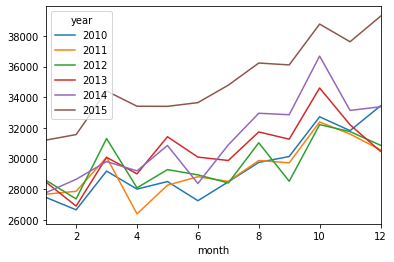

In [22]:
df4.plot()

In [23]:
pop =  [37319502, 37638369, 37948800, 38260787, 38596972, 38918045]
years = [2010, 2011, 2012, 2013, 2014, 2015]
df4[2010] = df4[2010] / 37319502
df4

C:\Users\aniha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


year,2010,2011,2012,2013,2014,2015
month,,,,,,
1,0.000736,27676,28597,28481,27770,31205
2,0.000714,27868,27370,26903,28651,31568
3,0.000782,30086,31310,30083,29807,34407
4,0.000751,26392,28093,29006,29198,33416
5,0.000764,28268,29281,31426,30857,33410
6,0.000730,28816,28939,30098,28375,33651
7,0.000763,28513,28413,29877,30898,34791
8,0.000797,29875,31032,31739,32958,36234
9,0.000808,29726,28522,31267,32862,36111


In [24]:
df4[2011] = df4[2011] / 37638369
df4[2012] = df4[2012] / 37948800
df4[2013] = df4[2013] / 38260787
df4[2014] = df4[2014] / 38596972
df4[2015] = df4[2015] / 38918045

C:\Users\aniha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aniha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aniha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [25]:
df4

year,2010,2011,2012,2013,2014,2015
month,,,,,,
1,0.000736,0.000735,0.000754,0.000744,0.000719,0.000802
2,0.000714,0.000740,0.000721,0.000703,0.000742,0.000811
3,0.000782,0.000799,0.000825,0.000786,0.000772,0.000884
4,0.000751,0.000701,0.000740,0.000758,0.000756,0.000859
5,0.000764,0.000751,0.000772,0.000821,0.000799,0.000858
6,0.000730,0.000766,0.000763,0.000787,0.000735,0.000865
7,0.000763,0.000758,0.000749,0.000781,0.000801,0.000894
8,0.000797,0.000794,0.000818,0.000830,0.000854,0.000931
9,0.000808,0.000790,0.000752,0.000817,0.000851,0.000928


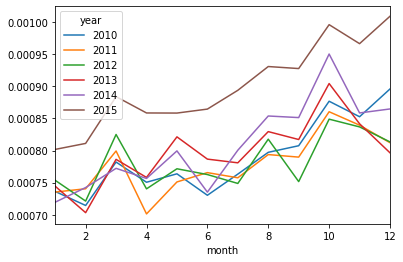

In [26]:
df4.plot()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

In [51]:
df7 = pd.crosstab(CA['year'],CA['month'])
df7 = df7.T
pop =  [36961229, 37319502, 37638369, 37948800, 38260787, 38596972, 38918045, 39167117]
#years = [2010, 2011, 2012, 2013, 2014, 2015]
df7[2009] = df7[2009] / 36961229
df7[2010] = df7[2010] / 37319502
df7[2011] = df7[2011] / 37638369
df7[2012] = df7[2012] / 37948800
df7[2013] = df7[2013] / 38260787
df7[2014] = df7[2014] / 38596972
df7[2015] = df7[2015] / 38918045
df7[2016] = df7[2016] / 39167117

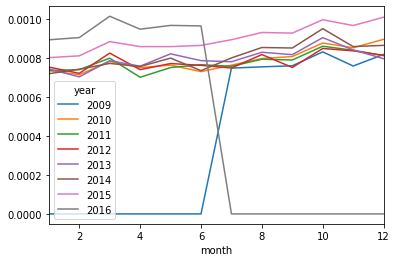

In [53]:
df7.plot()

In [35]:
x = CA[['year', 'violation']]

In [36]:
x.head()

,year,violation
97,2009,Traffic Collision
176,2009,Traffic Collision
231,2009,Traffic Collision
236,2009,Traffic Collision
237,2009,Traffic Collision


In [39]:
df1 = pd.crosstab(CA['year'], 'count')
df1

col_0,count
year,
2009,172679
2010,353453
2011,351781
2012,356404
2013,366168
2014,374587
2015,420476
2016,222961


In [40]:
df1 = df1.reset_index()

In [41]:
df1

col_0,year,count
0,2009,172679
1,2010,353453
2,2011,351781
3,2012,356404
4,2013,366168
5,2014,374587
6,2015,420476
7,2016,222961


In [42]:
population = [36961229, 37319502, 37638369, 37948800, 38260787, 38596972, 38918045, 39167117]

In [43]:
df1['population'] = population
df1['Crashes_Normalized'] = df1['count']/df1['population']

In [44]:
df1.head()

col_0,year,count,population,Crashes_Normalized
0,2009,172679,36961229,0.004672
1,2010,353453,37319502,0.009471
2,2011,351781,37638369,0.009346
3,2012,356404,37948800,0.009392
4,2013,366168,38260787,0.009570


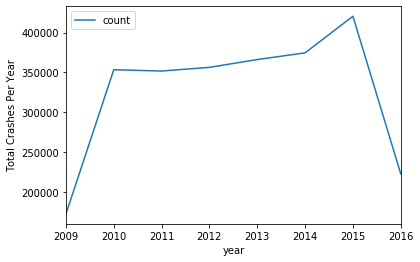

In [46]:
import matplotlib.pylab as plt
%matplotlib inline

# your code here
#Plotting the depth vs accuracy
fig, ax = plt.subplots() #get axis to plot on
df1.plot(ax=ax,x='year',y='count')#, yticks=np.arange(0, 7000000, step=1000000)) #show the data
plt.ylabel('Total Crashes Per Year')
plt.show()

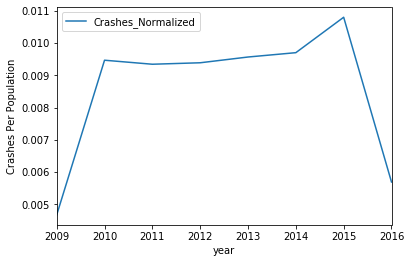

In [47]:
import matplotlib.pylab as plt
%matplotlib inline

# your code here
#Plotting the depth vs accuracy
fig, ax = plt.subplots() #get axis to plot on
df1.plot(ax=ax,x='year',y='Crashes_Normalized') #show the data
plt.ylabel('Crashes Per Population')
plt.show()

In [45]:
(CA_statewide.violation.unique())

array(['Motorist / Public Service', 'Moving Violation (VC)',
       'Mechanical or Nonmoving Violation (VC)', 'DUI Check',
       'Inspection / Scale Facility', 'Traffic Collision',
       'Penal Code / All Other Codes',
       'Other Agency Assist / BOLO / APB / Warrant'], dtype=object)

In [42]:
CA_statewide.type.unique()

array(['vehicular'], dtype=object)

In [47]:
df2 = pd.crosstab(x['violation'], 'count')
df2 = df2.reset_index()

In [49]:
df2['population'] = population
df2['Violations_Normalized'] = df2['count']/df1['population']

In [51]:
df2

col_0,violation,count,population,Violations_Normalized
0,DUI Check,981707,36961229,0.026560
1,Inspection / Scale Facility,2260698,37319502,0.060577
2,Mechanical or Nonmoving Violation (VC),6480506,37638369,0.172178
3,Motorist / Public Service,6025049,37948800,0.158768
4,Moving Violation (VC),13202009,38260787,0.345053
5,Other Agency Assist / BOLO / APB / Warrant,72100,38596972,0.001868
6,Penal Code / All Other Codes,137937,38918045,0.003544
7,Traffic Collision,2618509,39167117,0.066855


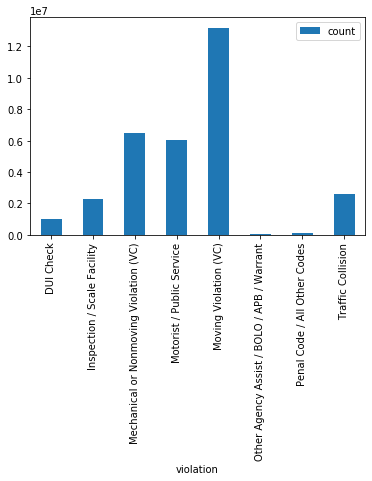

In [53]:
ax = df2.plot.bar(x='violation', y='count')

In [120]:
SF = pd.read_csv('ca_san_francisco_2019_12_17.csv')

In [121]:
SF = SF.dropna(axis=1)
SF.head()

,raw_row_number,date,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,search_conducted,search_vehicle,raw_search_vehicle_description,raw_result_of_contact_description
0,869921,2014-08-01,asian/pacific islander,female,vehicular,False,False,True,False,False,No Search,Warning
1,869922,2014-08-01,black,male,vehicular,False,True,False,False,False,No Search,Citation
2,869923,2014-08-01,hispanic,male,vehicular,False,True,False,False,False,No Search,Citation
3,869924,2014-08-01,hispanic,male,vehicular,False,False,True,False,False,No Search,Warning
4,869925,2014-08-01,white,male,vehicular,False,True,False,False,False,No Search,Citation


In [124]:
SF['citation_issued'] = SF['citation_issued'].astype(str)
#SF.citation_issued.dtypes

In [113]:
citation_true=['True']

In [114]:
citation_true

['True']

In [125]:
SF = SF[SF['citation_issued'] == 'True']

In [126]:
SF.head()

,raw_row_number,date,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,search_conducted,search_vehicle,raw_search_vehicle_description,raw_result_of_contact_description
1,869922,2014-08-01,black,male,vehicular,False,True,False,False,False,No Search,Citation
2,869923,2014-08-01,hispanic,male,vehicular,False,True,False,False,False,No Search,Citation
4,869925,2014-08-01,white,male,vehicular,False,True,False,False,False,No Search,Citation
5,869926,2014-08-01,black,male,vehicular,False,True,False,False,False,No Search,Citation
6,869927,2014-08-01,hispanic,male,vehicular,False,True,False,False,False,No Search,Citation


In [127]:
SF['date'] = pd.to_datetime(SF['date'])
SF['date']  = SF['date'] .apply(lambda x: x.year)
SF.date.unique()

array([2014, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016],
      dtype=int64)

In [129]:
df3 = pd.crosstab(SF['date'], 'count')
df3
df3 = df3.reset_index()

In [130]:
df3

col_0,date,count
0,2007,76084
1,2008,79275
2,2009,76467
3,2010,72464
4,2011,69013
5,2012,56660
6,2013,50506
7,2014,65186
8,2015,58932
9,2016,27073
